<a href="https://colab.research.google.com/github/ssshhhubh/MNIST-analysis-using-LENET/blob/master/0429_PyTorchCNN_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Outline

* Downloading dataset (CIFAR10)
* `Dataloader` in `torch.utils`
* Visualising images
* Single and multiple convolutional layers
* LeNet
* Training LeNet
* Training on GPU


In [0]:
import torch
import matplotlib.pyplot as plt
import numpy as np

## Data loading

In [0]:
import torchvision
import torchvision.transforms as transforms
trainset = torchvision.datasets.MNIST(root='./data', train=True, 
                                        download=True, 
                                        transform=transforms.ToTensor())

In [0]:
classes = ('0', '1', '2', '3', '4', '5', '6', '7', '8', '9')

In [0]:
trainloader = torch.utils.data.DataLoader(trainset, batch_size=4, shuffle=True)

In [5]:
dataiter = iter(trainloader)
images, labels = dataiter.next()

print(images.shape)

print(images[1].shape)
print(labels[1].item())

torch.Size([4, 1, 28, 28])
torch.Size([1, 28, 28])
0


## Visualise data

In [6]:
img = images[1]
print(type(img))

<class 'torch.Tensor'>


In [7]:
npimg = img.numpy()
print(npimg.shape)

(1, 28, 28)


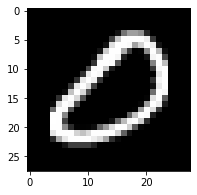

In [8]:
plt.figure(figsize = (3,3))
plt.imshow(npimg[0],cmap='gray')

In [0]:
def imshow(img):
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

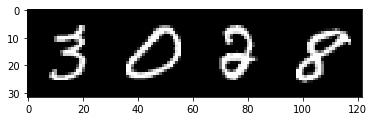

3 0 2 8


In [10]:
imshow(torchvision.utils.make_grid(images))
print(' '.join(classes[labels[j]] for j in range(4)))

## Single Convolutional Layer

In [0]:
import torch.nn as nn

class FirstCNN(nn.Module):
    def __init__(self): 
        super(FirstCNN, self).__init__()
        self.conv1 = nn.Conv2d(1, 16, 3, padding=(1,1), stride=(2,2)) # padding=(1,1), stride=(2,2))
        
    def forward(self, x):
        x = self.conv1(x)
        return x

In [0]:
net = FirstCNN()

In [13]:
out = net(images)
out.shape

torch.Size([4, 16, 14, 14])

In [14]:
for param in net.parameters():
    print(param.shape)

torch.Size([16, 1, 3, 3])
torch.Size([16])


In [15]:
out1 = out[0, 0, :, :].detach().numpy()
print(out1.shape)

(14, 14)


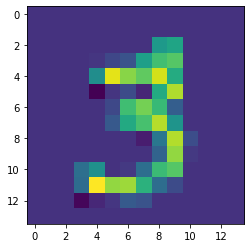

In [16]:
plt.imshow(out[0, 0, :, :].detach().numpy())
plt.show()

## Deep Convolutional Network

In [0]:
class FirstCNN_v2(nn.Module):
    def __init__(self): 
        super(FirstCNN_v2, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 8, 3),   # (N, 3, 28, 28) -> (N, 8, 26, 36)
            nn.Conv2d(8, 16, 3)   # (N, 8, 26, 26) -> (N, 16, 24, 24)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [18]:
net = FirstCNN_v2()
out = net(images)
out.shape

torch.Size([4, 16, 24, 24])

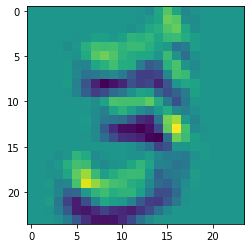

In [19]:
plt.imshow(out[0, 0, :, :].detach().numpy())

In [0]:
class FirstCNN_v3(nn.Module):
    def __init__(self): 
        super(FirstCNN_v3, self).__init__()
        self.model = nn.Sequential(
            nn.Conv2d(1, 6, 5),          # (N, 1, 28, 28) -> (N, 6, 24, 24)
            nn.AvgPool2d(2, stride=2),   # (N, 6, 24, 24) -> (N, 6, 12, 12)
            nn.Conv2d(6, 16, 5),         # (N, 6, 12, 12) -> (N, 16, 8, 8)
            nn.AvgPool2d(2, stride=2)    # (N, 16, 8, 8) -> (N, 16, 4, 4)
        )
        
    def forward(self, x):
        x = self.model(x)
        return x

In [21]:
net = FirstCNN_v3()
out = net(images)
out.shape

torch.Size([4, 16, 4, 4])

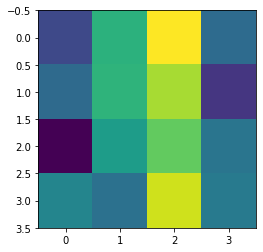

In [22]:
plt.imshow(out[0, 0, :, :].detach().numpy())

## LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self): 
        super(LeNet, self).__init__()
        self.cnn_model = nn.Sequential(
            nn.Conv2d(1, 6, 5),         # (N, 1, 28, 28) -> (N,  4, 24, 24)
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2),  # (N, 6, 24, 24) -> (N,  6, 12, 12)
            nn.Conv2d(6, 16, 5),        # (N, 6, 12, 12) -> (N, 16, 8, 8)  
            nn.Tanh(),
            nn.AvgPool2d(2, stride=2)   # (N,16, 8, 8) -> (N, 16, 4, 4)
        )
        self.fc_model = nn.Sequential(
            nn.Linear(256,120),         # (N, 256) -> (N, 120)
            nn.Tanh(),
            nn.Linear(120,84),          # (N, 120) -> (N, 84)
            nn.Tanh(),
            nn.Linear(84,10)            # (N, 84)  -> (N, 10)
        )
        
    def forward(self, x):
        print(x.shape)
        x = self.cnn_model(x)
        print(x.shape)
        x = x.view(x.size(0), -1)
        print(x.shape)
        x = self.fc_model(x)
        print(x.shape)
        return x
  

In [30]:
net = LeNet()
out = net(images)

torch.Size([4, 1, 28, 28])
torch.Size([4, 16, 4, 4])
torch.Size([4, 256])
torch.Size([4, 10])


In [31]:
print(out)

tensor([[-0.1032,  0.0274, -0.0476, -0.0422, -0.0957, -0.0135,  0.0260,  0.0181,
         -0.1054, -0.0627],
        [-0.0909,  0.0089, -0.0559, -0.0245, -0.1035, -0.0129,  0.0342,  0.0315,
         -0.1004, -0.0692],
        [-0.1083,  0.0440, -0.0470, -0.0551, -0.0944, -0.0207,  0.0230,  0.0335,
         -0.1025, -0.0537],
        [-0.1111,  0.0200, -0.0658, -0.0340, -0.0896, -0.0136,  0.0332,  0.0359,
         -0.1078, -0.0599]], grad_fn=<AddmmBackward>)


In [32]:
max_values, pred_class = torch.max(out.data, 1)
print(pred_class)

tensor([1, 6, 1, 7])


## Training LeNet

In [0]:
class LeNet(nn.Module):
    def __init__(self):
      super().__init__() 
      self.cnn_model = nn.Sequential(
          nn.Conv2d(1, 6, 5),         # (N, 1, 28, 28) -> (N,  6, 24, 24)
          nn.Tanh(),
          nn.AvgPool2d(2, stride=2),  # (N, 6, 24, 24) -> (N,  6, 12, 12)
          nn.Conv2d(6, 16, 5),        # (N, 6, 12, 12) -> (N, 16, 8, 8)  
          nn.Tanh(),
          nn.AvgPool2d(2, stride=2)   # (N,16, 8, 8) -> (N, 16, 4, 4)
      )
      self.fc_model = nn.Sequential(
          nn.Linear(256,120),         # (N, 400) -> (N, 120)
          nn.Tanh(),
          nn.Linear(120,84),          # (N, 120) -> (N, 84)
          nn.Tanh(),
          nn.Linear(84,10)            # (N, 84)  -> (N, 10)
      )
      
    def forward(self, x):
        x = self.cnn_model(x)
        x = x.view(x.size(0), -1)
        x = self.fc_model(x)
        return x

In [0]:
batch_size = 128
trainset = torchvision.datasets.MNIST(root='./data', train=True, download=True, transform=transforms.ToTensor())
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size, shuffle=True)
testset = torchvision.datasets.MNIST(root='./data', train=False, download=True, transform=transforms.ToTensor())
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size, shuffle=False)

In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet()

In [0]:
import torch.optim as optim

loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

Epoch: 0/16, Test acc: 95.21, Train acc: 95.02
Epoch: 1/16, Test acc: 97.20, Train acc: 97.08
Epoch: 2/16, Test acc: 97.75, Train acc: 97.88
Epoch: 3/16, Test acc: 98.00, Train acc: 98.28
Epoch: 4/16, Test acc: 98.29, Train acc: 98.53
Epoch: 5/16, Test acc: 98.30, Train acc: 98.75
Epoch: 6/16, Test acc: 98.66, Train acc: 99.14
Epoch: 7/16, Test acc: 98.54, Train acc: 99.18
Epoch: 8/16, Test acc: 98.73, Train acc: 99.42
Epoch: 9/16, Test acc: 98.68, Train acc: 99.48
Epoch: 10/16, Test acc: 98.60, Train acc: 99.43
Epoch: 11/16, Test acc: 98.60, Train acc: 99.62
Epoch: 12/16, Test acc: 98.95, Train acc: 99.74
Epoch: 13/16, Test acc: 98.87, Train acc: 99.71
Epoch: 14/16, Test acc: 98.73, Train acc: 99.60
Epoch: 15/16, Test acc: 98.77, Train acc: 99.65


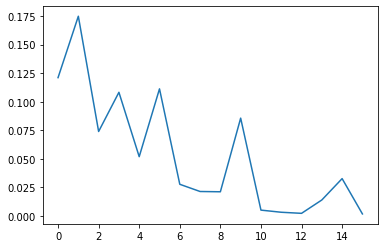

CPU times: user 5min 46s, sys: 5.46 s, total: 5min 52s
Wall time: 5min 53s


In [48]:
%%time
loss_arr = []
loss_epoch_arr = []
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
        loss_arr.append(loss.item())
        
    loss_epoch_arr.append(loss.item())
        
    print('Epoch: %d/%d, Test acc: %0.2f, Train acc: %0.2f' % (epoch, max_epochs, evaluation(testloader), evaluation(trainloader)))
    
    
plt.plot(loss_epoch_arr)
plt.show()

## Move to GPU

In [49]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cuda:0


In [0]:
def evaluation(dataloader):
    total, correct = 0, 0
    for data in dataloader:
        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)
        outputs = net(inputs)
        _, pred = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (pred == labels).sum().item()
    return 100 * correct / total

In [0]:
net = LeNet().to(device)
loss_fn = nn.CrossEntropyLoss()
opt = optim.Adam(net.parameters())

In [52]:
%%time
max_epochs = 16

for epoch in range(max_epochs):

    for i, data in enumerate(trainloader, 0):

        inputs, labels = data
        inputs, labels = inputs.to(device), labels.to(device)

        opt.zero_grad()

        outputs = net(inputs)
        loss = loss_fn(outputs, labels)
        loss.backward()
        opt.step()
        
    print('Epoch: %d/%d' % (epoch, max_epochs))

Epoch: 0/16
Epoch: 1/16
Epoch: 2/16
Epoch: 3/16
Epoch: 4/16
Epoch: 5/16
Epoch: 6/16
Epoch: 7/16
Epoch: 8/16
Epoch: 9/16
Epoch: 10/16
Epoch: 11/16
Epoch: 12/16
Epoch: 13/16
Epoch: 14/16
Epoch: 15/16
CPU times: user 1min 23s, sys: 526 ms, total: 1min 23s
Wall time: 1min 24s


In [53]:
print('Test acc: %0.2f, Train acc: %0.2f' % (evaluation(testloader), evaluation(trainloader)))

Test acc: 98.71, Train acc: 99.77
